In [1]:
import numpy as np

In [28]:
a = np.array([[1,2,3]])
a

array([[1, 2, 3]])

In [29]:
a.shape

(1, 3)

In [30]:
# tranpose a to (1,3)
a = np.transpose(a)
a

array([[1],
       [2],
       [3]])

In [49]:
a.shape

(3, 1)

In [5]:
b = np.array([[1,2],[3,4]])
b

array([[1, 2],
       [3, 4]])

In [7]:
b.shape

(2, 2)

## Mimicking cost function


Theta shape is 2 * 1 while X shape is m * 2. Theoretically, X multiplies theta should give m * 1



In [45]:
theta = np.array([3,2])
theta.shape

(2,)

In [46]:
X = np.array([[1,3],[2,5],[9,4]])
X.shape

(3, 2)

In [47]:
X

array([[1, 3],
       [2, 5],
       [9, 4]])

In [50]:
hypo = np.dot(X, theta)
hypo

array([ 9, 16, 35])

In [52]:
# another one

In [68]:
t = np.array([3,2])
t.shape

(2,)

In [69]:
t

array([3, 2])

In [70]:
t =t.reshape((1,2))
t.shape

(1, 2)

In [71]:
t

array([[3, 2]])

In [86]:
haha = np.zeros(2)
haha.shape

(2,)

In [87]:
haha

array([0., 0.])

In [89]:
haha = haha.reshape((1,haha.size))
haha.shape

(1, 2)

In [90]:
haha

array([[0., 0.]])

## Implement linear regression by scratch

In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [14]:
X = np.array([100,120,130,140,150,110])
y = np.array([205,217,230,237,254,216])
m = y.size

In [15]:
m

6

In [16]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = pyplot.figure()  # open a new figure
    
    # ====================== YOUR CODE HERE ======================= 
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')

    # =============================================================


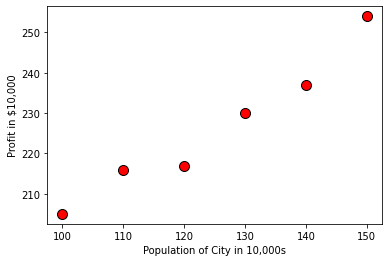

In [17]:
plotData(X, y)

In [18]:
X.shape

(6,)

In [19]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

In [20]:
X.shape

(6, 2)

In [22]:
X[3]

array([  1., 140.])

## Computing the cost

In [23]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    # theta's shape is 2 * 1 while X shape is m*2
    # so it would be X * theta, which results in X*1

    hypo = np.dot(X, theta)

    diff = np.subtract(hypo, y)
    sum = np.sum(diff**2)
    J = sum/(2*m)
    
    # ===========================================================
    return J

In [31]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)

# further testing of the cost function
J = computeCost(X, y, theta=np.array([100, 1]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)

With theta = [0, 0] 
Cost computed = 25779.58
With theta = [-1, 2]
Cost computed = 7.92


## Gradient descent

In [27]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        # slide 36 of Lecture2
        
        # theta's shape is 2 * 1 while X shape is m*2
        # so it would be X * theta, which results in X*1

        hypo = np.dot(X, theta)
        
        diff = np.subtract(hypo, y)
        diff = np.multiply(diff, X[:, 0])
        # calculate new theta zero 
    
        sigma = np.sum(diff)
        deri = sigma/m
        nZero = theta[0] - alpha * deri
       
        # calculate new theta one
        diff1 = np.multiply(diff, X[:,1])  # since X now has 2 columns, X[0] is filled with 1
        
        sigma1 = np.sum(diff1)
        deri1 = sigma1/m
        nOne = theta[1] - alpha * deri1
        
        print(nZero, nOne)
        
        theta[0] = nZero
        theta[1] = nOne
        
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
        print("Cost ", computeCost(X, y, theta))
    
    return theta, J_history

In [53]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 250
alpha = 0.00005

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

0.011325 1.429
Cost  1189.464171419479
0.01371818375 1.7206833854166668
Cost  164.94154971331236
0.014288226681958333 1.7802204525407987
Cost  122.25565062644584
0.014486134442244242 1.7923723743103175
Cost  120.47698460059503
0.014608082796082646 1.7948521547480925
Cost  120.40267702712616
0.014714526424767263 1.7953576810769267
Cost  120.39937982349402
0.014817805191715234 1.7954602274297178
Cost  120.39904119540076
0.014920437880019911 1.7954805184844524
Cost  120.39882583373077
0.015022938617598083 1.7954840197871589
Cost  120.39861560820059
0.015125412346997462 1.7954840940068517
Cost  120.398405597031
0.01522788048883729 1.7954834686992303
Cost  120.39819559516137
0.015330347415442657 1.7954827006063707
Cost  120.39798559404794
0.015432814019282069 1.795481903369121
Cost  120.39777559333474
0.015535280482524099 1.795481100183575
Cost  120.39756559300707
0.01563774684235263 1.7954802957844642
Cost  120.39735559306405
0.01574021310635761 1.7954794911382301
Cost  120.39714559350598


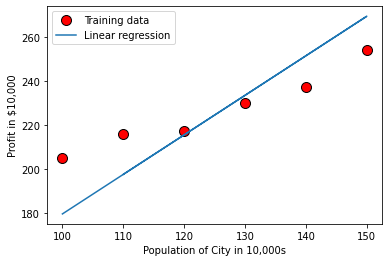

In [52]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

In [50]:
theta[0]

0.11652153542135305

In [30]:
from flask import jsonify
import numpy as np

def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    # theta's shape is 2 * 1 while X shape is m*2
    # so it would be X * theta, which results in X*1

    hypo = np.dot(X, theta)

    diff = np.subtract(hypo, y)
    sum = np.sum(diff**2)
    J = sum/(2*m)
    
    # ===========================================================
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        # slide 36 of Lecture2
        
        # theta's shape is 2 * 1 while X shape is m*2
        # so it would be X * theta, which results in X*1

        hypo = np.dot(X, theta)
        
        diff = np.subtract(hypo, y)
        diff = np.multiply(diff, X[:, 0])
        # calculate new theta zero 
    
        sigma = np.sum(diff)
        deri = sigma/m
        nZero = theta[0] - alpha * deri
       
        # calculate new theta one
        diff1 = np.multiply(diff, X[:,1])  # since X now has 2 columns, X[0] is filled with 1
        
        sigma1 = np.sum(diff1)
        deri1 = sigma1/m
        nOne = theta[1] - alpha * deri1
        
        theta[0] = nZero
        theta[1] = nOne
        
        # =====================================================================
        
    
    return theta

def hello_world():
    """Responds to any HTTP request.
    Args:
        request (flask.Request): HTTP request object.
    Returns:
        The response text or any set of values that can be turned into a
        Response object using
        `make_response <https://flask.palletsprojects.com/en/1.1.x/api/#flask.Flask.make_response>`.
    """

    X = np.array([100,120,130,140,150,110])
    y = np.array([205,217,230,237,254,216]) 
    # Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
    # The first axis (axis=0) refers to rows (training examples) 
    # and second axis (axis=1) refers to columns (features).
    m = y.size
    X = np.stack([np.ones(m), X], axis=1)

    # initialize fitting parameters
    theta = np.zeros(2)

    # some gradient descent settings
    iterations = 500
    alpha = 0.00005

    theta = gradientDescent(X ,y, theta, alpha, iterations)

    data = {"x0": theta[0], "x1": theta[1]}

    return data
    # if request.args and 'message' in request.args:
    #     return jsonify(data)
    # elif request_json and 'message' in request_json:
    #     return jsonify(data)
    # else:
    #     return jsonify(data)

In [31]:
a = hello_world()

In [32]:
a

{'x0': 0.06532286793515386, 'x1': 1.7950900981290703}

In [3]:
for i in range(1,4):
    print("haha",i)

haha 1
haha 2
haha 3
